In [2]:
from tsp_annealing import *
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
opt_distance_51, opt_distance_280, opt_distance_442 = calculate_optimal_distances()

cities_51 = load_graph('TSP-Configurations/eil51.tsp.txt')
cities_280 = load_graph('TSP-Configurations/a280.tsp.txt')
cities_442 = load_graph('TSP-Configurations/pcb442.tsp.txt')

distances_51 = calculate_distances(cities_51)
distances_280 = calculate_distances(cities_280)
distances_442 = calculate_distances(cities_442)

In [4]:
def load_data_file(file_path):
    data = []
    max_iter_list = []

    with open(file_path, 'r') as csvfile:
        reader = csv.reader(csvfile)
        header_skipped = False
        max_iters_obtained = False

        for row in reader:
            if not header_skipped:
                header_skipped = True
            elif not max_iters_obtained:
                max_iters_obtained = True
                max_iter_list = [int(val) for val in row]  # Extract number of iterations
                col_count = len(max_iter_list)  # Count of columns
                data = [[] for _ in range(col_count)]  # Create sublists for each column
            else:
                for i in range(col_count):
                    data[i].append(float(row[i]))  # Append data to corresponding column sublist

    return data, max_iter_list

def load_experiment(filepaths, labels):
    results = {}
    for (filepath, label) in zip(filepaths, labels):
        temp, max_iter_list = load_data_file(filepath)
        results[label] = temp
    return results, max_iter_list 

def plot_comparison(results, max_iterations_list, param_labels):
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'magenta', 'darkgreen']

    opt_distance_line = [opt_distance_280 for _ in max_iterations_list]

    for i, param_label in enumerate(param_labels):
        means = np.array([np.mean(elem) for elem in results[param_label]])
        stds = np.array([np.std(elem) for elem in results[param_label]])
        z_score = 1.96 

        conf_intervals = np.column_stack([
        means - z_score * (stds / np.sqrt(len(means))),
        means + z_score * (stds / np.sqrt(len(means)))
        ])

        lower_bounds = np.array([interval[0] for interval in conf_intervals])
        upper_bounds = np.array([interval[1] for interval in conf_intervals])

        plt.plot(max_iterations_list, means, marker='o', linestyle='-', color=colors[i], label=param_label)
        plt.fill_between(max_iterations_list, lower_bounds, upper_bounds, alpha=0.3)
        
    plt.plot(max_iterations_list, opt_distance_line, linestyle='--', color='black', label='Optimal Distance')
    plt.title('Mean Distance over Number of Max Iterations')
    plt.xlabel('Max Iterations')
    plt.ylabel('Mean Distance')
    plt.legend()
    plt.show()

def plot_distributions(results, param_labels):
    fig, axs = plt.subplots(1, len(param_labels), figsize=(10, 2))
    for i, param_label in enumerate(param_labels):
        axs[i].hist(results[i])
        axs[i].set_title(param_label)

plt.style.use('default')


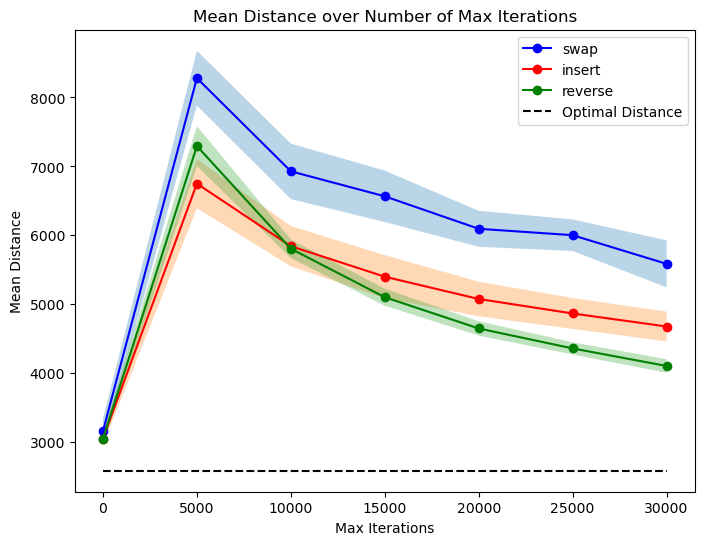

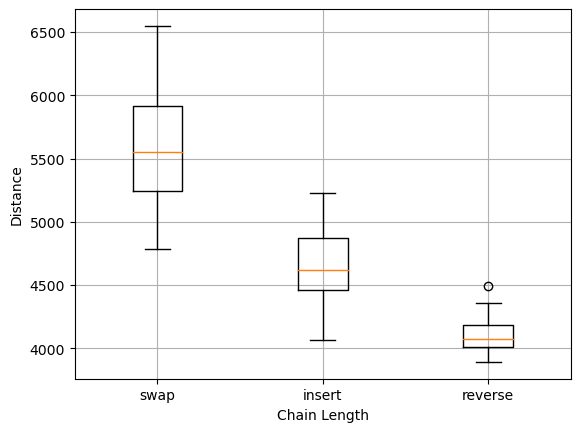

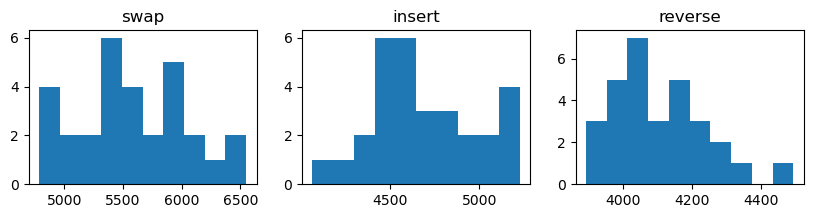

In [5]:
filepaths = [
    'generated_data/dist_perm_operator-swap_maxiter30001.csv', 
    'generated_data/dist_perm_operator-insert_maxiter30001.csv',
    'generated_data/dist_perm_operator-reverse_maxiter30001.csv'
    ]
labels = ['swap', 'insert', 'reverse']

data_perm_operators, max_iter_list = load_experiment(filepaths, labels)
plot_comparison(data_perm_operators, max_iter_list, param_labels=labels)


final_dists_perm_operators = [data_perm_operators[perm_operator][-1] for perm_operator in labels]
plt.boxplot(final_dists_perm_operators, labels=labels)
plt.xlabel('Chain Length')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

plot_distributions(final_dists_perm_operators, labels)

[5538.594506102643, 5847.081957488106, 5375.96990171789, 5454.509080403629, 5156.968656446559, 5564.995157140289, 6063.342758254276, 4907.165292104256, 5032.517572709371, 5423.720168736064, 5439.724445121737, 5590.476298060925, 4782.503025497559, 5094.172356639926, 5787.337907574985, 6530.1066386004295, 5449.341797098028, 5922.679574130996, 5987.072487696864, 5662.915645724602, 5204.671903519259, 5879.963590320321, 6114.103470927221, 6228.27653705279, 6548.826717046091, 4934.253093776611, 4935.457196673391, 5430.378747549505, 5927.234906879169, 5788.569566013371]
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=4782.503025497559, statistic_sign=-1)
[4561.824343741291, 4606.771557396379, 4854.010656181141, 4377.796862477696, 4457.10090262424, 4551.458980198623, 4521.512900881963, 4808.728076598934, 5165.586759537042, 4232.504675700597, 4692.335088909769, 4479.623195230181, 4652.7764871576555, 4066.004648099143, 4376.9616936113825, 4993.712632892039, 4628.417688105765, 4420.637

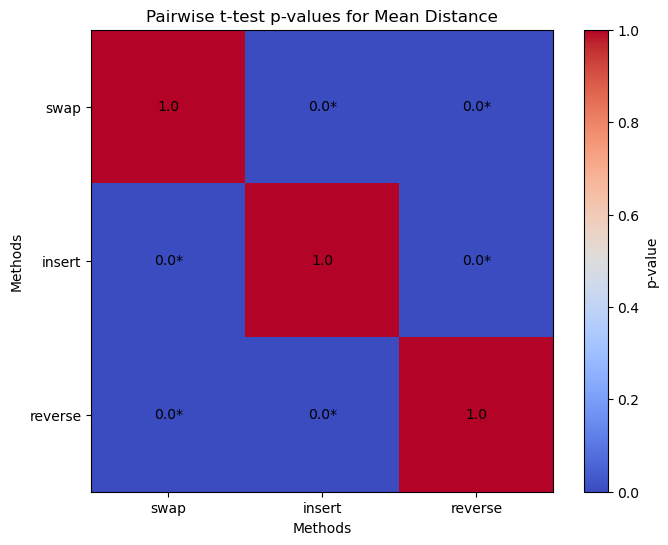

In [19]:
for data in final_dists_perm_operators:
    print(stats.kstest(data, 'norm'))

for i in range(len(final_dists_perm_operators)):
    for j in range(i, len(final_dists_perm_operators)):
        if i != j:
            data1 = final_dists_perm_operators[i]
            data2 = final_dists_perm_operators[j]
            print(stats.mannwhitneyu(data1, data2))

plot_pairwise_ttest(final_dists_perm_operators, labels)

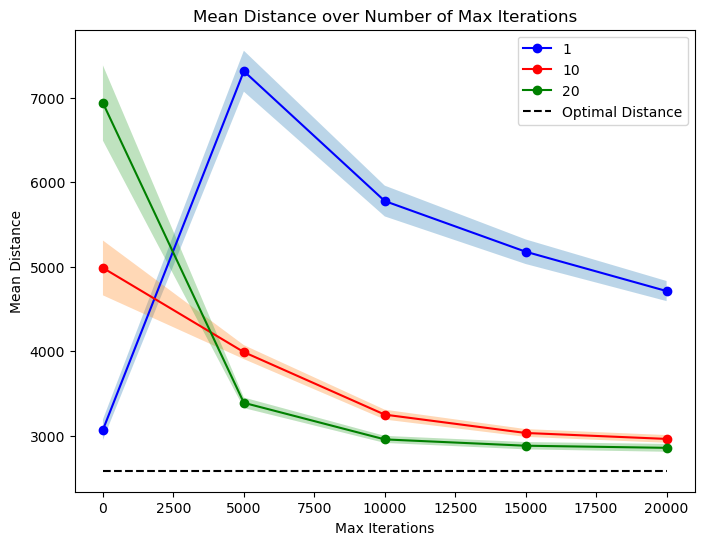

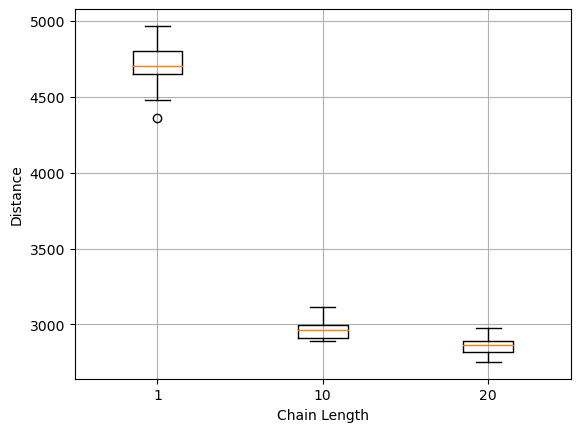

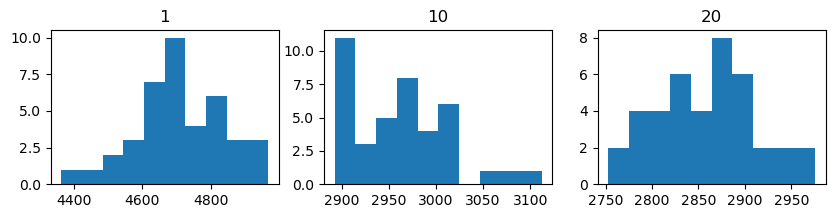

In [20]:
filepaths = [
    'generated_data/dist_chain_length-1_maxiter20001_numruns40.csv', 
    'generated_data/dist_chain_length-10_maxiter20001_numruns40.csv',
    'generated_data/dist_chain_length-20_maxiter20001_numruns40.csv'
    ]

labels = [1, 10, 20]

data_chain_length, max_iter_list = load_experiment(filepaths, labels)
plot_comparison(data_chain_length, max_iter_list, param_labels=labels)


final_dists_chain_length = [data_chain_length[length][-1] for length in labels]
plt.boxplot(final_dists_chain_length, labels=labels)
plt.xlabel('Chain Length')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

plot_distributions(final_dists_chain_length, labels)

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=4782.503025497559, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=4066.004648099143, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=3892.82159938619, statistic_sign=-1)
MannwhitneyuResult(statistic=859.0, pvalue=1.5465212858330377e-09)
MannwhitneyuResult(statistic=900.0, pvalue=3.019859359162157e-11)
MannwhitneyuResult(statistic=873.0, pvalue=4.1996766179584087e-10)


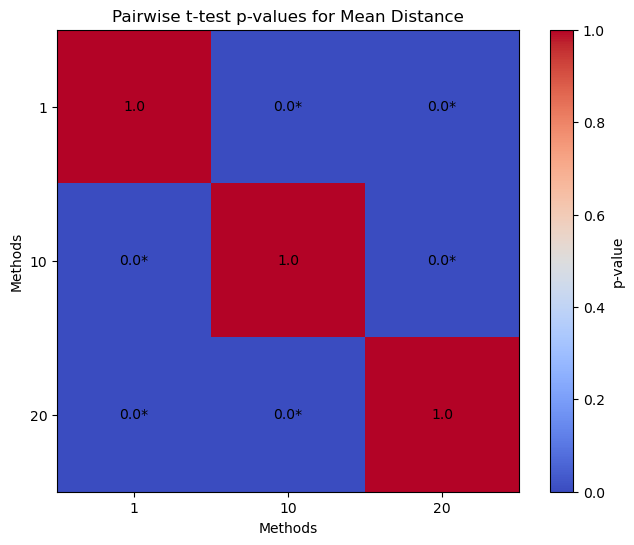

In [21]:
for data in final_dists_perm_operators:
    print(stats.kstest(data, 'norm'))

for i in range(len(final_dists_perm_operators)):
    for j in range(i, len(final_dists_perm_operators)):
        if i != j:
            data1 = final_dists_perm_operators[i]
            data2 = final_dists_perm_operators[j]
            print(stats.mannwhitneyu(data1, data2))

plot_pairwise_ttest(final_dists_chain_length, labels)

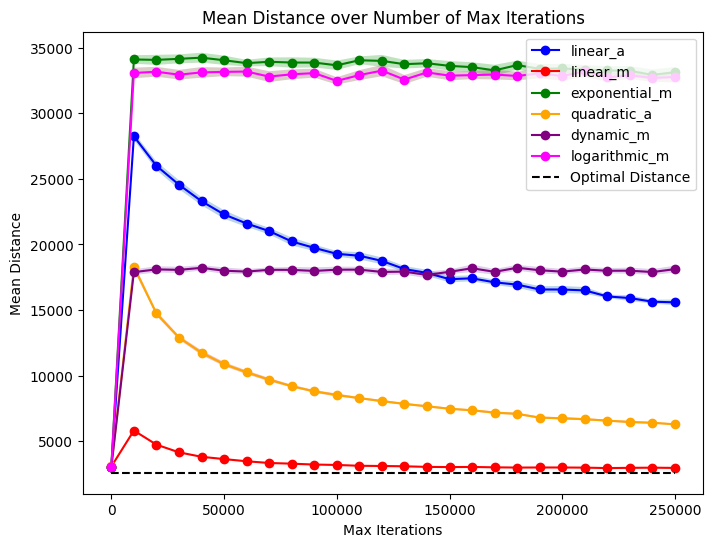

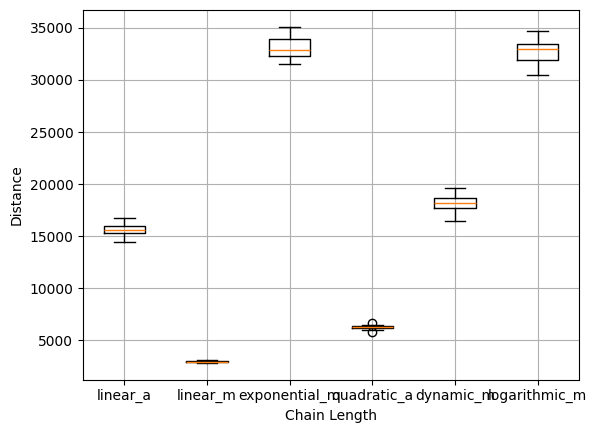

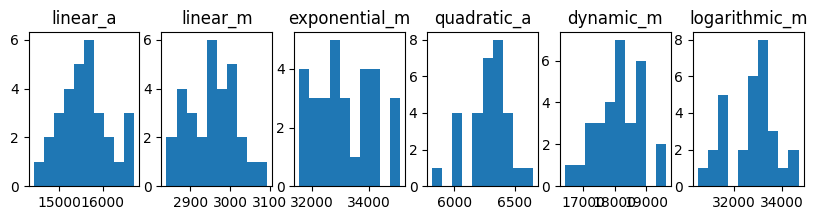

In [7]:
labels = ['linear_a', 'linear_m', 'exponential_m', 'quadratic_a', 'dynamic_m', 'logarithmic_m']

filepaths = []
maxiter = 250001
for label in labels:
    filepaths.append(f'generated_data/schedules/dist_schedule-{label}_maxiter{maxiter}.csv')

data_schedules, max_iter_list = load_experiment(filepaths, labels)
plot_comparison(data_schedules, max_iter_list, param_labels=labels)


final_dists_schedules = [data_schedules[length][-1] for length in labels]
plt.boxplot(final_dists_schedules, labels=labels)
plt.xlabel('Chain Length')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

final_dists_schedules = [data_schedules[label][-1] for label in labels]
plot_distributions(final_dists_schedules, labels)

ShapiroResult(statistic=0.9808970093727112, pvalue=0.8488753437995911)
ShapiroResult(statistic=0.9789819717407227, pvalue=0.7978826761245728)
ShapiroResult(statistic=0.9482972025871277, pvalue=0.15217934548854828)
ShapiroResult(statistic=0.9490444660186768, pvalue=0.15937550365924835)
ShapiroResult(statistic=0.984257698059082, pvalue=0.9238871335983276)
ShapiroResult(statistic=0.9489993453025818, pvalue=0.1589316725730896)


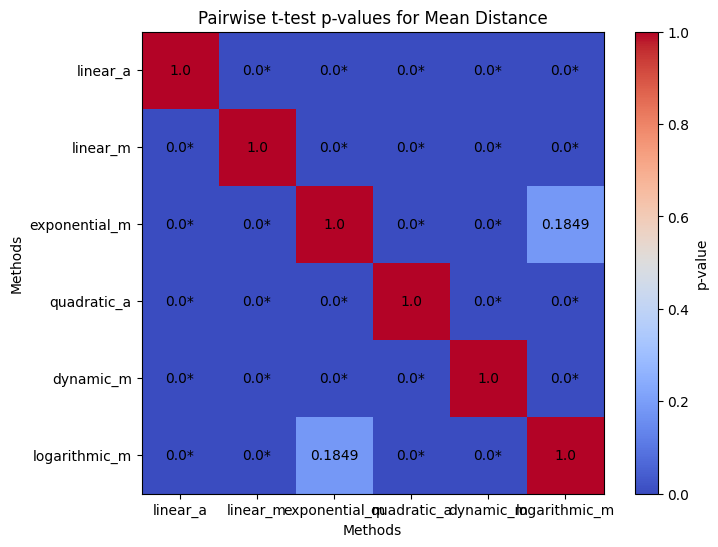

In [8]:
for data in final_dists_schedules:
    print(stats.shapiro(data))

plot_pairwise_ttest(final_dists_schedules, labels)